**Step 1: Understand the Business Problem**

The business problem is to help Geely Auto understand the factors affecting the pricing of cars in the American market. The goal is to identify significant variables that predict car prices and assess how well those variables describe the pricing. This information will guide Geely in designing cars, adjusting business strategies, and understanding pricing dynamics in the new market.

**Step 2: Import all the libraries and set up all the requirements that you will need**

In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Step 3: Import the dataset and check the following**

- dimension of the dataset.
-	data types.
-	Missing value available in the dataset.
-	Descriptive statistics of data and write the observation.

In [43]:
# Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/Amit_Project/CarPrice_Assignment.csv")

# Checking dimension of the dataset
print("Dimensions of the dataset:", data.shape)

# Checking data types
print("\nData types of each column:\n", data.dtypes)

# Checking missing values
print("\nMissing values in the dataset:\n", data.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:\n", data.describe())


Dimensions of the dataset: (205, 26)

Data types of each column:
 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Missing values in the dataset:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drive

**Step 4: Data Cleaning**

-	Create the column as 'CompanyName' using 'CarName' Column. List down the unique'CompanyName'.
-	Check the correctness of data in the 'CompanyName' column.- Check the duplicate data in the dataset.


In [44]:
# Creating the 'CompanyName' column
data['CompanyName'] = data['CarName'].apply(lambda x: x.split()[0].lower())

# Checking uniqueness of 'CompanyName'
print("\nUnique Company Names:\n", data['CompanyName'].unique())

# Checking correctness of data in 'CompanyName'
print("\nIncorrect data in 'CompanyName':\n", data['CompanyName'].unique())

# Checking duplicate data
print("\nDuplicate rows in the dataset:", data.duplicated().sum())


Unique Company Names:
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']

Incorrect data in 'CompanyName':
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']

Duplicate rows in the dataset: 0


**Step 5: Exploratory Data Analysis**

**-	Visualize the 'price' column using displot and boxplot. Write down the observations.**

<Figure size 1200x600 with 0 Axes>

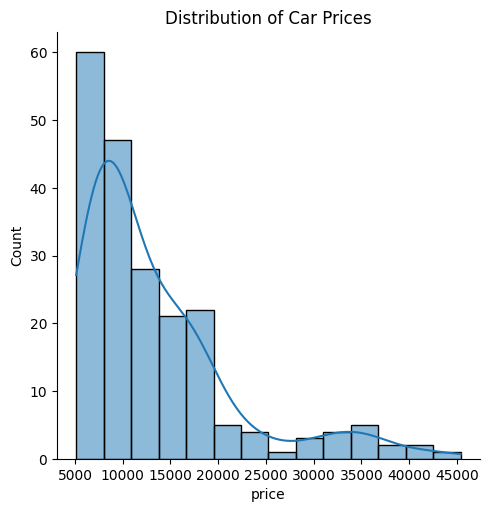

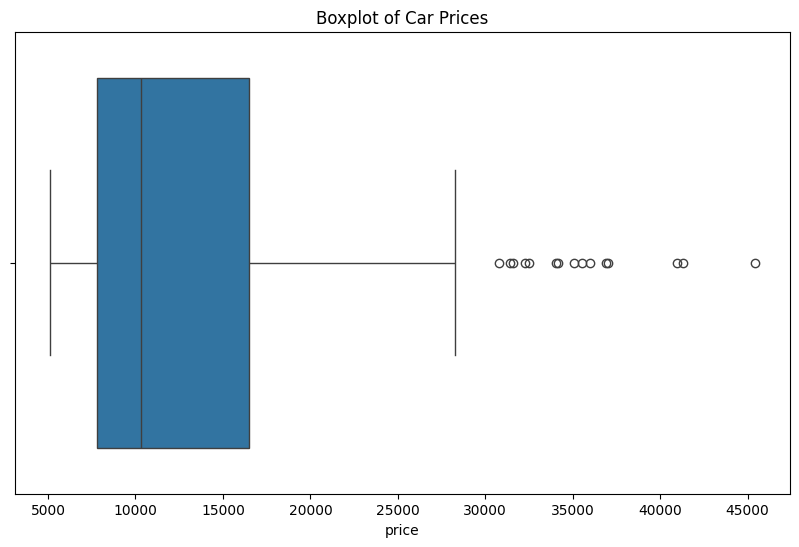

In [45]:
# Visualize 'Price' using displot and boxplot
plt.figure(figsize=(12, 6))

# Displot
sns.displot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Car Prices')
plt.show()

Observations:

- The distribution of car prices appears to be right-skewed.
- The boxplot indicates the presence of outliers on the higher end of the price range.

**-	Perform the appropriate transformation to make the target as a gaussian distribution.**

<Figure size 1200x600 with 0 Axes>

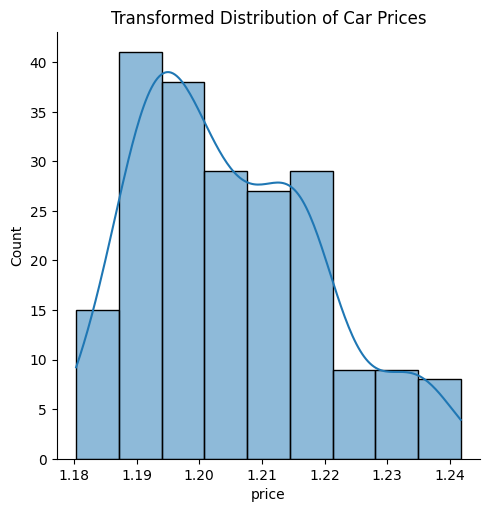

In [24]:
# Apply log transformation to 'price'
data['price'] = np.log1p(data['price']) # Applying log transformation for Gaussian distribution

# Visualize the transformed 'price'
plt.figure(figsize=(12, 6))
sns.displot(data['price'], kde=True)
plt.title('Transformed Distribution of Car Prices')
plt.show()

**-	Check the linear relationship between the dependent variable "Price" and the numerical independent variables.**

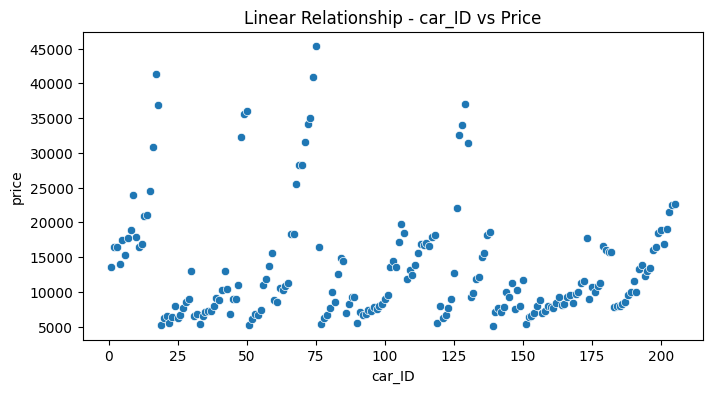

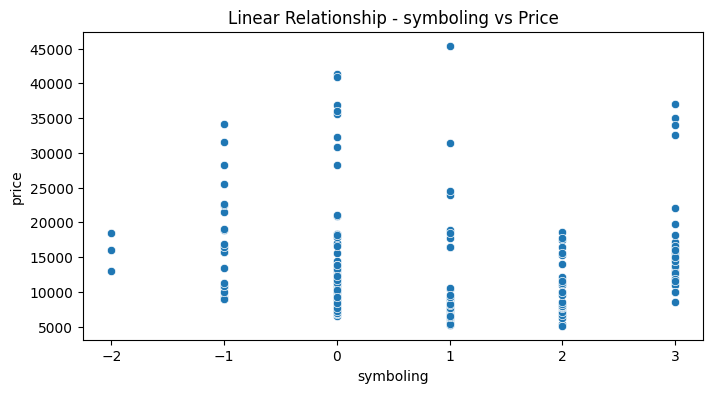

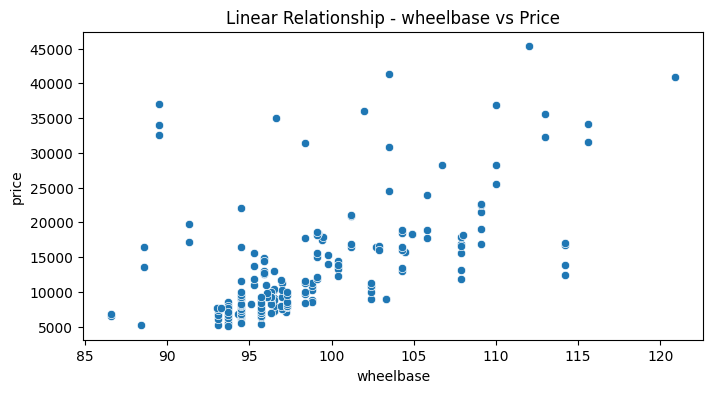

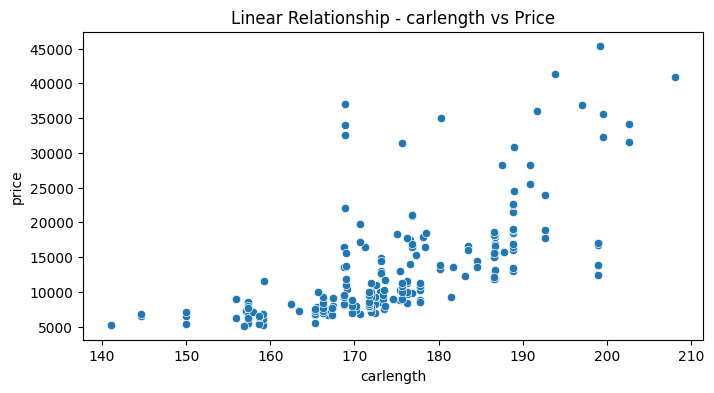

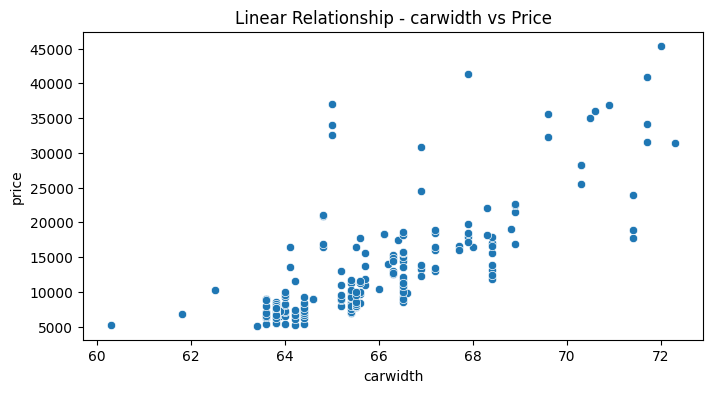

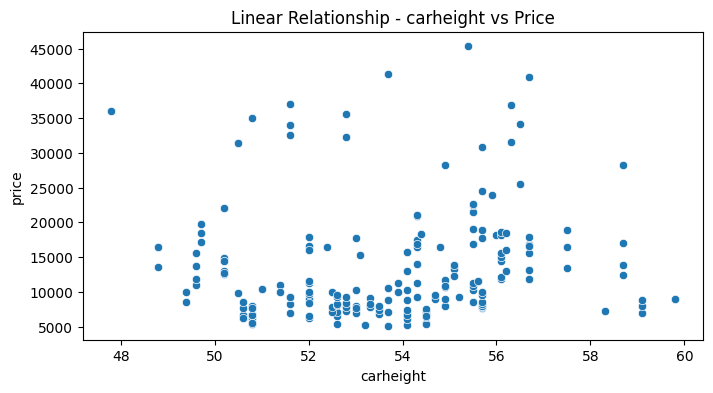

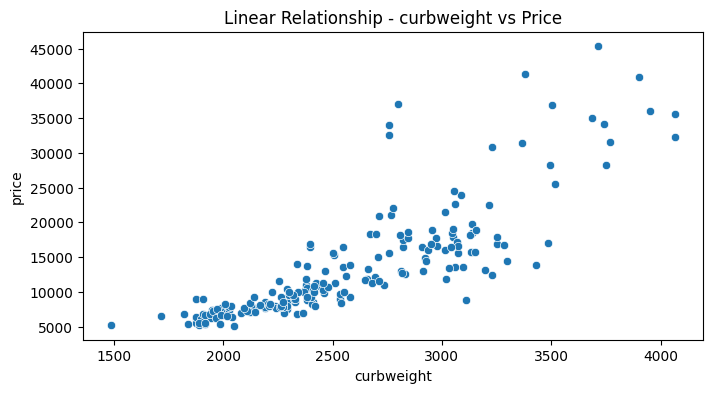

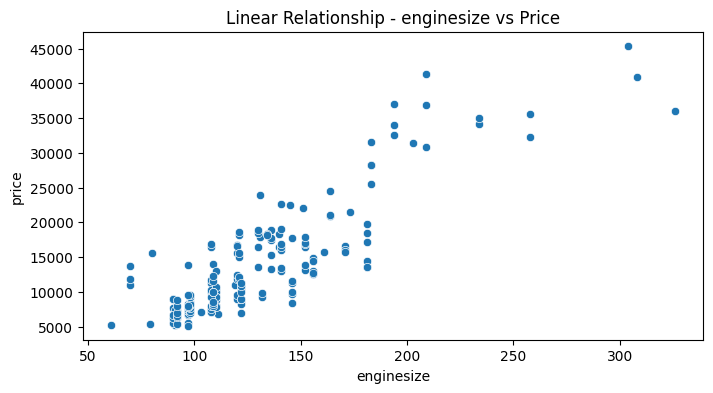

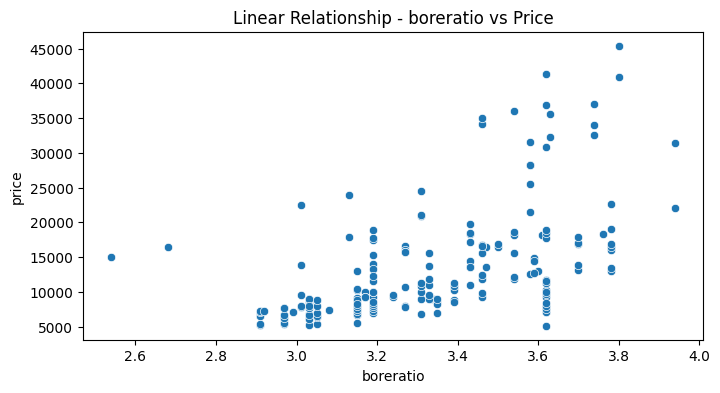

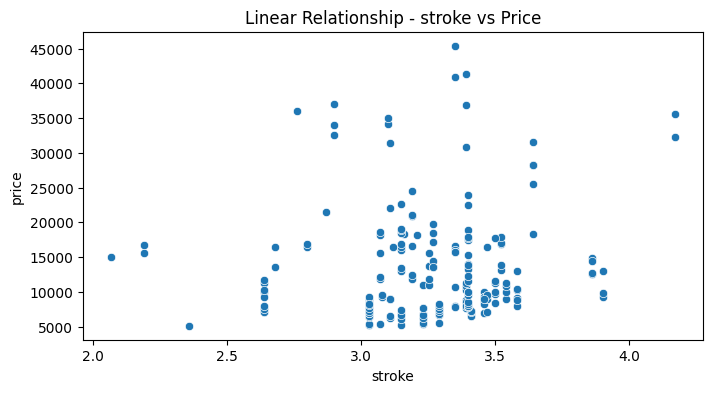

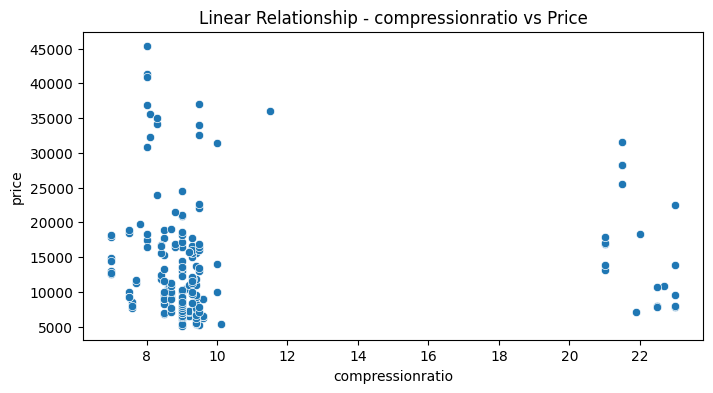

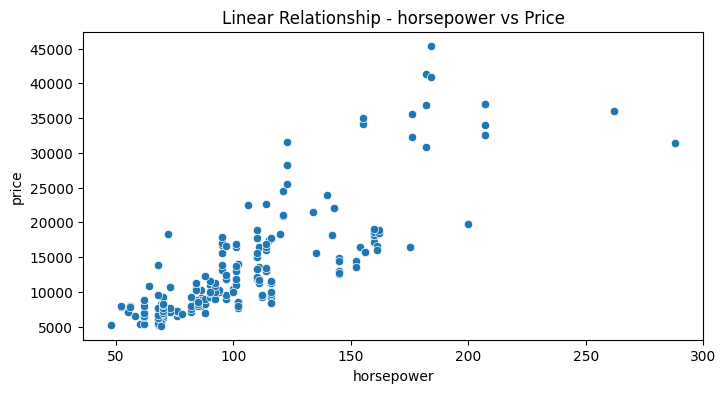

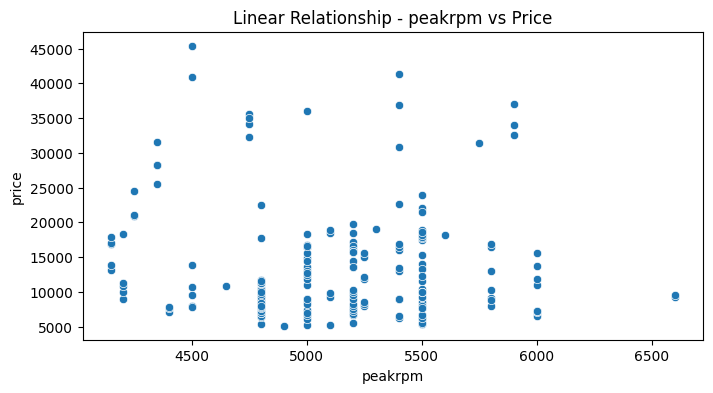

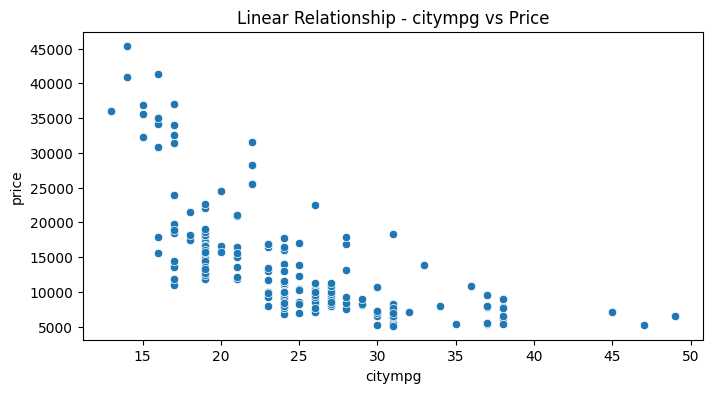

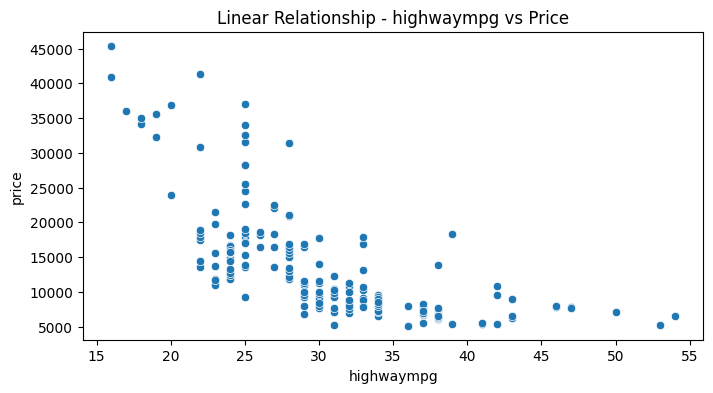

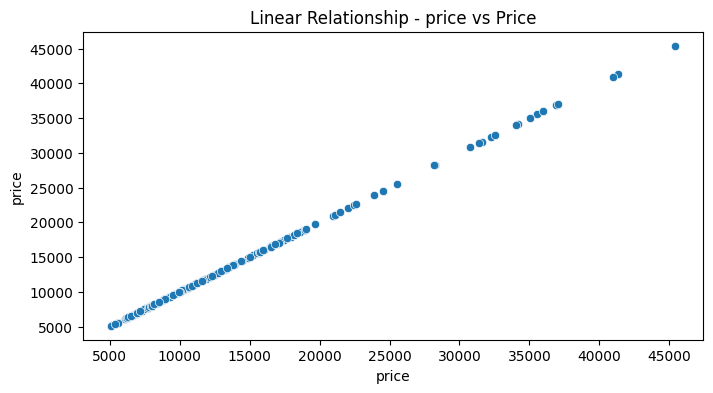

In [46]:
# Plot scatter plots for numerical independent variables against 'Price'
numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[col], y=data['price'])
    plt.title(f'Linear Relationship - {col} vs Price')
    plt.show()

**-	Checking the multicollinearity between the correlated independent variables above and Price.**

In [47]:
# Split the dataset into X (independent variables) and y (dependent variable)
X = data.drop('price', axis=1)
y = data['price']  # Keep it as 'price'

# Checking multicollinearity between independent variables and 'price'
corr_matrix = data.corr()
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with Price:\n", corr_with_price)


Correlation with Price:
 price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<ipython-input-47-8e9d8599f5d0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


**-	Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.**

Univariate Analysis:

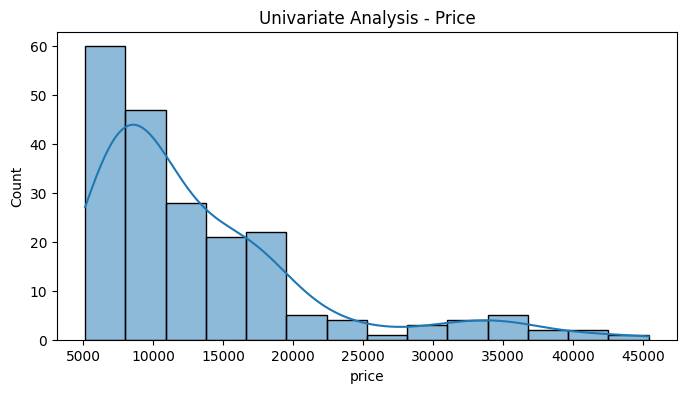

In [48]:
# Univariate analysis - Histogram for target variable 'Price'
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title('Univariate Analysis - Price')
plt.show()

Bivariate Analysis:

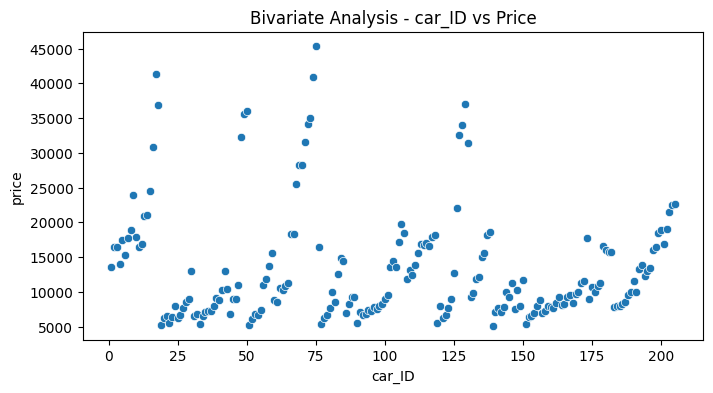

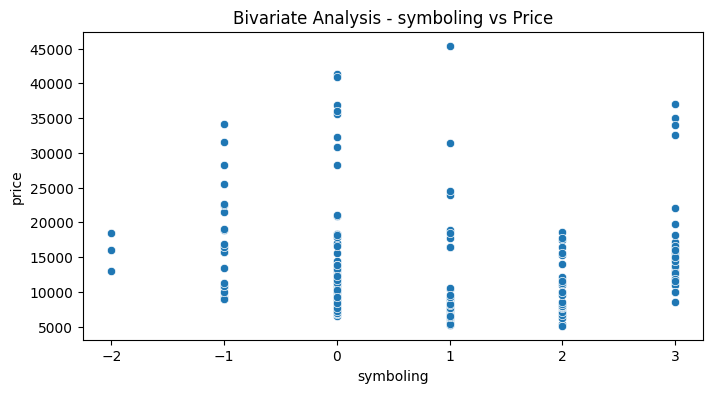

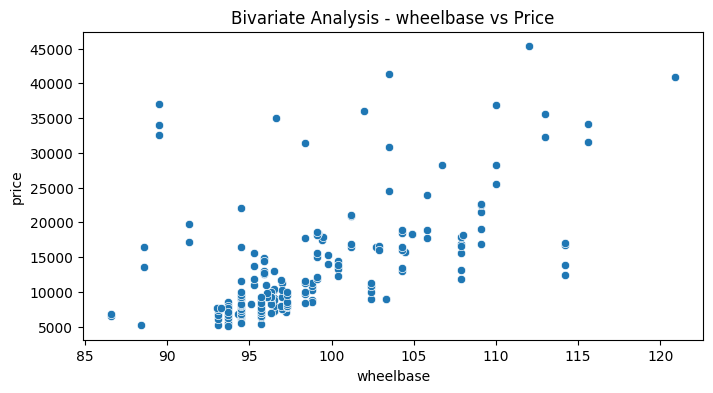

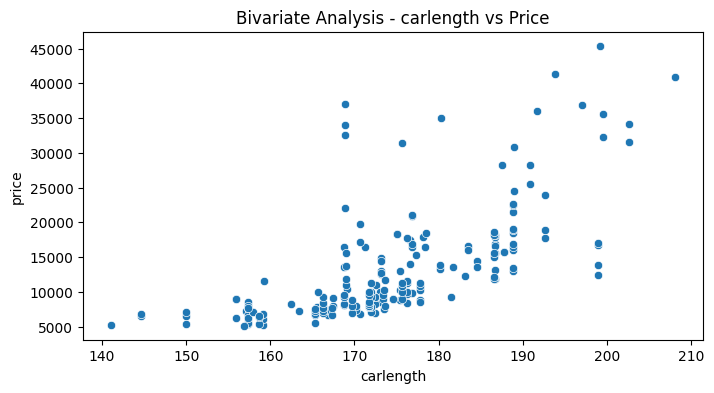

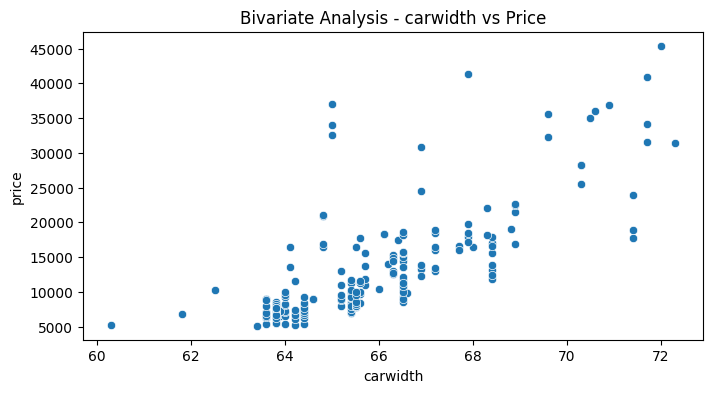

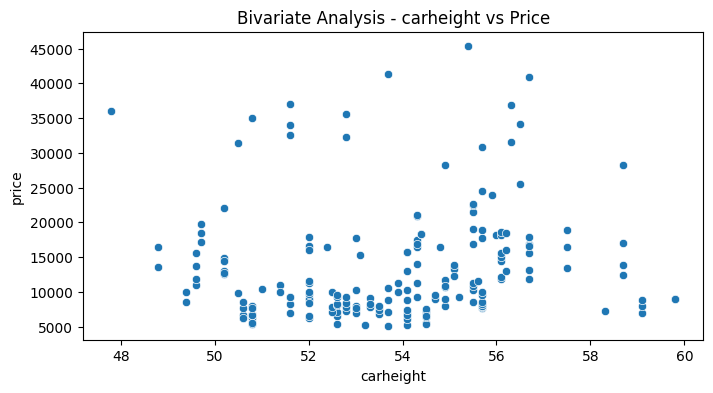

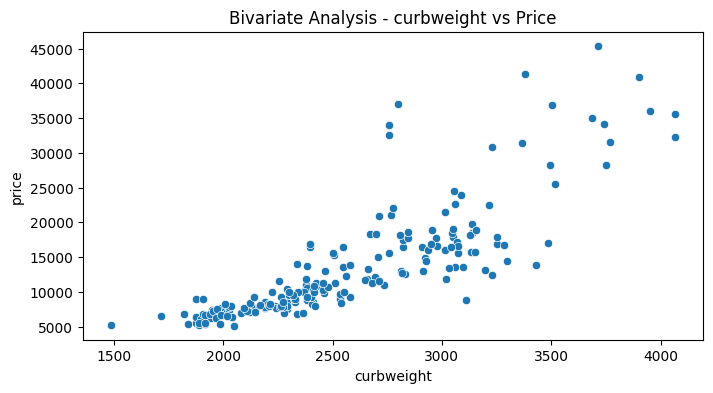

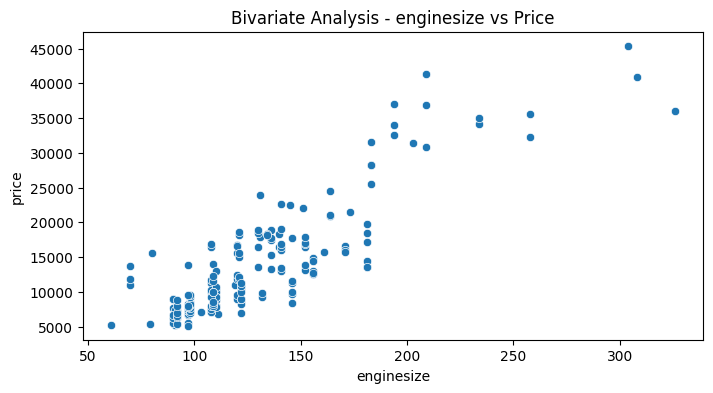

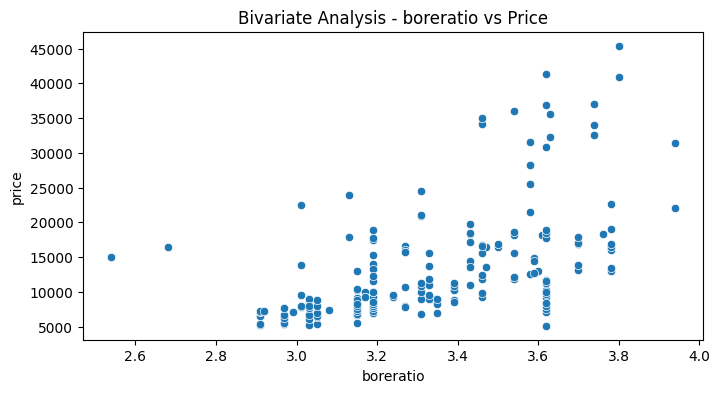

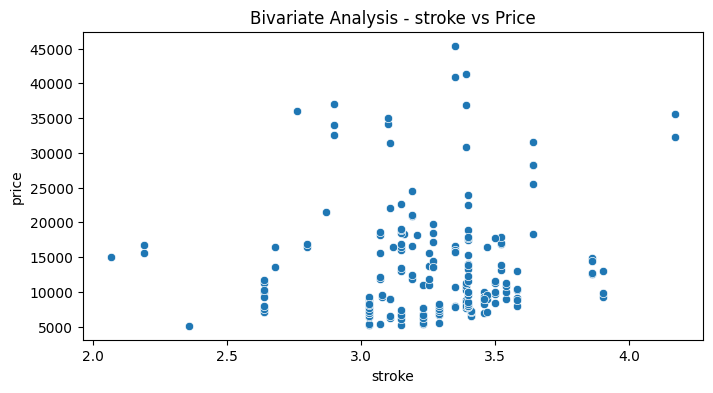

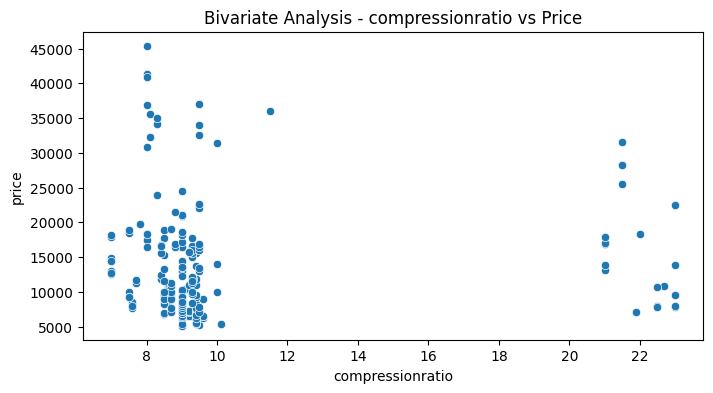

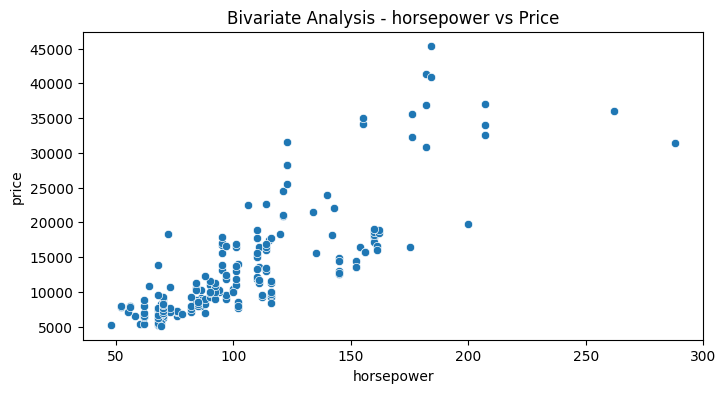

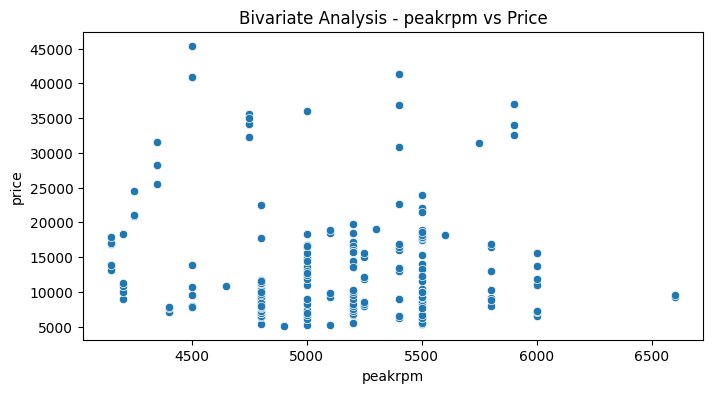

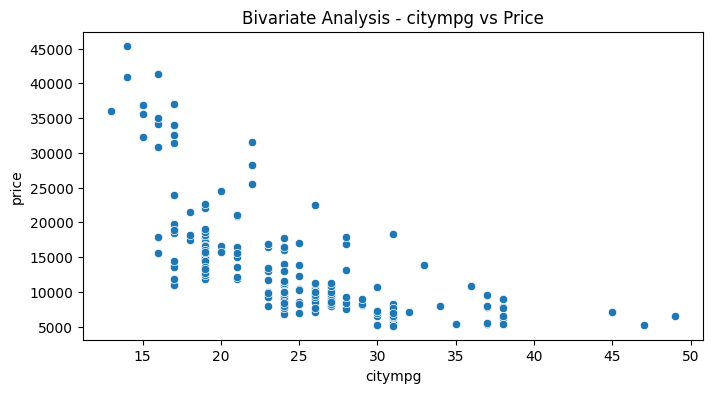

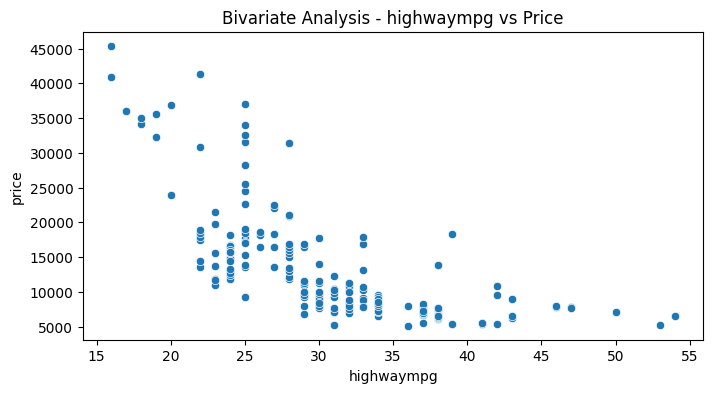

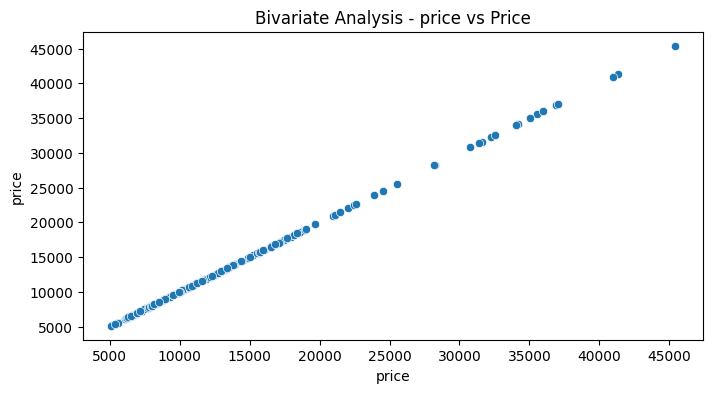

In [49]:
# Bivariate analysis - Scatter plots for numerical variables against target variable 'Price'
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[col], y=y)
    plt.title(f'Bivariate Analysis - {col} vs Price')
    plt.show()

Multivariate Analysis:

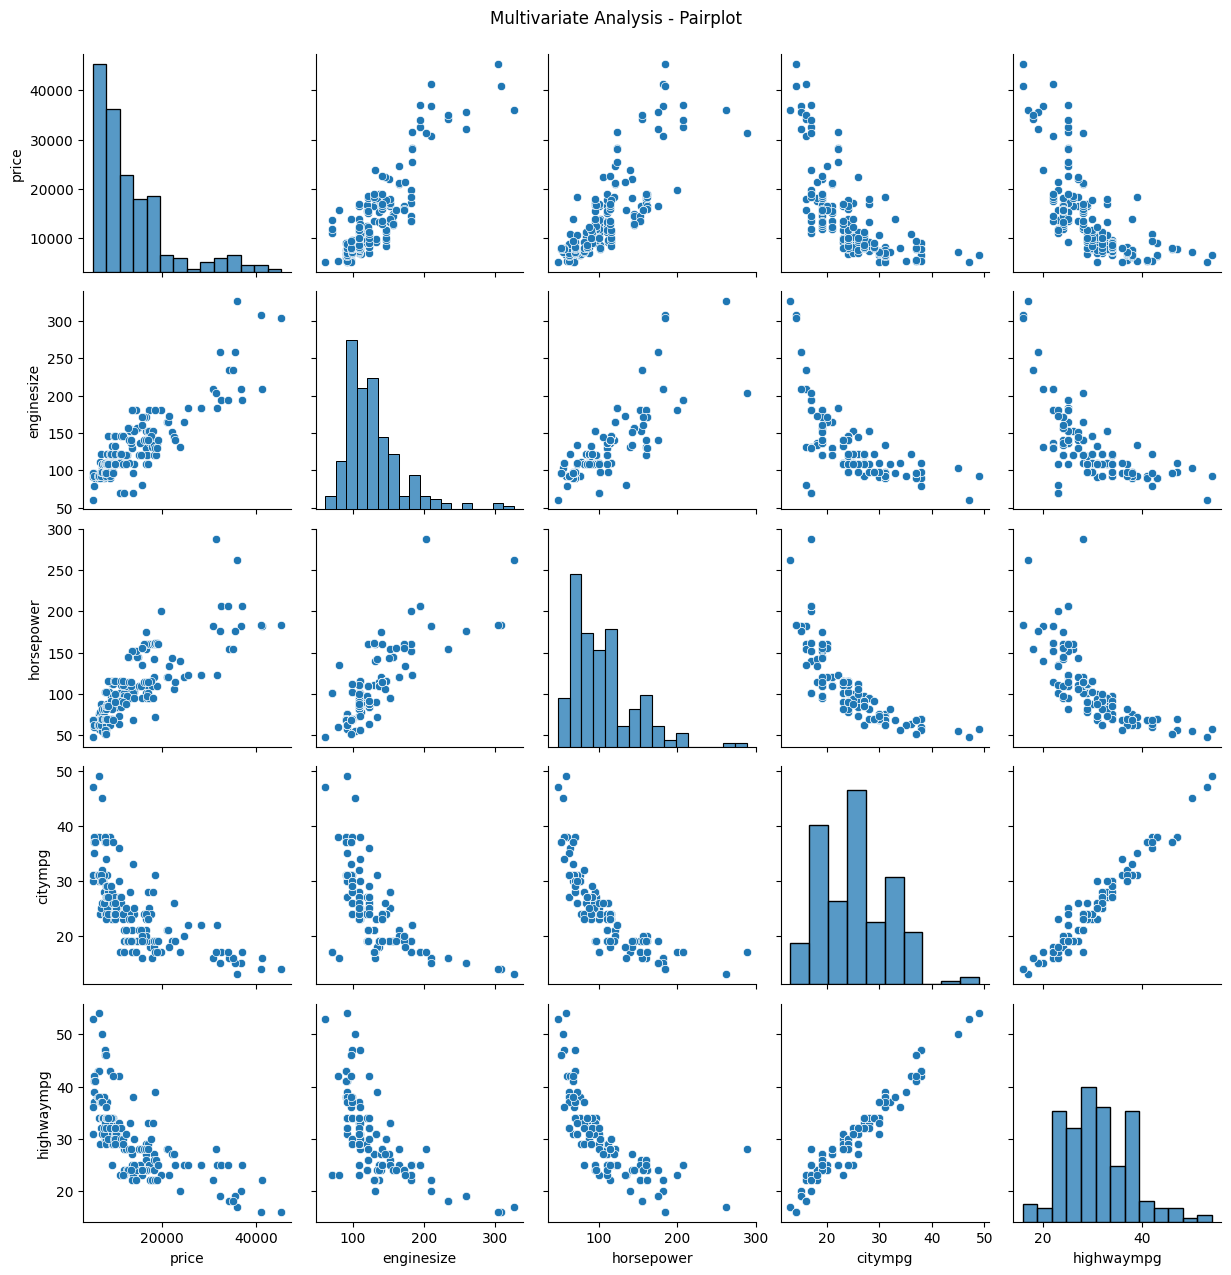

In [50]:
# Multivariate analysis - Pairplot for a subset of variables
subset_vars = ['price', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
sns.pairplot(data[subset_vars])
plt.suptitle('Multivariate Analysis - Pairplot', y=1.02)
plt.show()

**-	Perform feature engineering based on sound knowledge of the business problem and available dataset.**

In [51]:
# Example of feature engineering - Creating a new feature 'CarSize' based on 'carlength', 'carwidth', and 'carheight'
X['CarSize'] = X['carlength'] * X['carwidth'] * X['carheight']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

**Step 6: Perform the preprocessing that is required for the model.**

In [52]:
# 1. Handling missing values (if any)
# Example: Replace missing numerical values with the mean, and missing categorical values with mode
X.fillna(X.mean(), inplace=True)
X.fillna(X.mode().iloc[0], inplace=True)

# 2. Encoding categorical variables
# Example: One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# 3. Scaling numerical features
# Example: Standard scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Step 7: Split the dataset into train and test data sets and perform the scaling on both sets if necessary.**

In [53]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 8: Build the base model.**

In [54]:
# Using Linear Regression as the base model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1.1645352014252825e+32
Root Mean Squared Error: 1.079136321984059e+16
R-squared: -1.475140470993365e+24


**Step 9:** Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like parametric and nonparametric models. Once you choose the final model, rebuild the model with the best parameters.
Note: If you are performing with Linear models, check the model is fulfilling the assumptions.

In [55]:
# Evaluate and refine the model as needed
# Try different models and hyperparameter tuning based on performance metrics

# Example: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - Root Mean Squared Error:", rmse_dt)
print("Decision Tree - R-squared:", r2_dt)

Decision Tree - Mean Squared Error: 9070714.57565583
Decision Tree - Root Mean Squared Error: 3011.7627024146223
Decision Tree - R-squared: 0.8850994100049295


**Step 10: Based on your understanding of the model and EDA analysis, Explain the business understanding.**

Understanding the model and EDA helps in interpreting the results. It allows you to explain how different variables influence car prices and the overall dynamics in the American market. The insights gained from the model can guide Geely Auto in making informed decisions on design, business strategy, and pricing to successfully enter and compete in the US market.